#Loading the Libraries 

In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from pandas import read_csv
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers.core import Activation
from keras.optimizers import Optimizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import backend
from keras import backend as K
from keras.regularizers import l1, l2, l1_l2
from keras.optimizers import Adam
from keras.losses import kullback_leibler_divergence
from keras.losses import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE , chi2
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform
from matplotlib import pyplot
import random as python_random
from numpy import reshape
from numpy import set_printoptions

#Dataset Loading 

In [ ]:
# Read the data set 
filename1 = 'adult.data'
filename2 = 'adult.test'
names = ('age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class')
sample_train = pd.read_csv(filename1,names= names, na_values=[' ?','?'])
sample_test = pd.read_csv(filename2, names= names, na_values=[' ?','?'])

In [ ]:
# To see the shape of the  train dataset
sample_train.shape

(32561, 15)

In [ ]:
# To see the shape of the  test dataset
sample_test.shape

(16282, 15)

#Cleaning the dataset

In [ ]:
# Here we drop the rows which has ' ?' in the test dataset
data_train = sample_train.dropna()
data_train.shape

(30162, 15)

In [ ]:
# Here we drop the rows which has ' ?' in the train dataset
data_test = sample_test.dropna()
data_test.shape

(15060, 15)

In [ ]:
data_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## Checking if there are any ' ?' or null values in the dataset

In [ ]:
# Here we check if there are any '?' values in any of the features
for c in names:
  print(c)
  print(data_train[c].value_counts())


age
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
fnlwgt
203488    13
113364    12
164190    12
123011    12
148995    12
          ..
34393      1
288341     1
239415     1
118352     1
229376     1
Name: fnlwgt, Length: 20263, dtype: int64
education
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
education-num
9     9840
10    6678
1

In [ ]:
for c in names:
  print(c)
  print(data_test[c].value_counts())

age
35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
87      1
89      1
84      1
Name: age, Length: 73, dtype: int64
workclass
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
fnlwgt
136986.0    9
203488.0    8
127651.0    8
120277.0    8
125892.0    8
           ..
153813.0    1
242589.0    1
227540.0    1
77143.0     1
204244.0    1
Name: fnlwgt, Length: 11913, dtype: int64
education
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
education-num
9.0     4943

# Data Conversion (using Leable Encoder)

In [ ]:
# Using Lable Encoder on train data to convert the Categorical data into Numerical data
data_train_new = data_train.apply(LabelEncoder().fit_transform)

In [ ]:
data_train_new


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,15471,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,2,7555,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,2,7377,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,2,12060,11,8,4,0,3,4,1,0,0,19,38,0


In [ ]:
# Using Lable Encoder on train data to convert the Categorical data into Numerical data
data_test_new = data_test.apply(LabelEncoder().fit_transform)

In [ ]:
data_test_new

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,8,2,8315,1,6,4,6,3,2,1,0,0,39,37,0
2,21,2,1754,11,8,2,4,0,4,1,0,0,49,37,0
3,11,1,10750,7,11,2,10,0,4,1,0,0,39,37,1
4,27,2,4780,15,9,2,6,0,2,1,87,0,39,37,1
6,17,2,7091,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16,2,8927,9,12,4,9,3,4,1,0,0,39,37,0
16277,22,2,7893,9,12,0,9,1,4,0,0,0,35,37,0
16279,21,2,11193,9,12,2,9,0,4,1,0,0,49,37,0
16280,27,2,1593,9,12,0,0,3,1,1,73,0,39,37,0


#Splitting train data into array and using MinMaxScaler to scale the data
 & 
Splitting test data into array and using MinMaxScaler to scale the data

In [ ]:
# Training data 
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data_train_new.values
# Seperate array into input and output
X = array[:, 0:14]
Y = array[:, 14]
scaler = MinMaxScaler(feature_range=(0, 1))
rX = scaler.fit_transform(X)


In [ ]:
# FOR Test data
array = data_test_new.values
# Seperate array into input and output
X_t = array[:, 0:14]
Y_t = array[:, 14]
scaler = MinMaxScaler(feature_range=(0, 1))
rX_t = scaler.fit_transform(X_t)

# Feature Selection (Filter, Wrapper & Embedded)

##Filter Method - SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
#Select k best on train set 
selectModel = SelectKBest(score_func=chi2, k=9)
kBesttrain = selectModel.fit(rX,Y)
selectTrainFeatures = kBesttrain.transform(rX)

In [ ]:
selectTrainFeatures.shape

(30162, 9)

In [ ]:
#Select k best on test set 
kBesttest = selectModel.fit(rX_t,Y_t)
selectTestFeatures = kBesttest.transform(rX_t)

In [ ]:
selectTestFeatures.shape

(15060, 9)

##Wrapper Method - Recurssive Feature Elemination (RFE)

In [ ]:
#RFE on train set
model_rfe = LogisticRegression(solver='liblinear') 
rfeModel = RFE(model_rfe, 9) 
rfeTrain = rfeModel.fit(rX,Y)
rfeTrainFeatures = rfeTrain.transform(rX)

In [ ]:
rfeTrainFeatures.shape

(30162, 9)

In [ ]:
#RFE on test set
rfeTest = rfeModel.fit(rX_t,Y_t)
rfeTestFeatures = rfeTest.transform(rX_t)

In [ ]:
rfeTestFeatures.shape

(15060, 9)

##Embedded method - using ExtraTreesClassifier

In [ ]:
#ExtraTree on train set
extraTreeModel = ExtraTreesClassifier(n_estimators=9)
exTreeTrain = extraTreeModel.fit(rX, Y)
clf_model = SelectFromModel(exTreeTrain, prefit=True)
exTreeTrainFeatures = clf_model.transform(rX)

In [ ]:
exTreeTrainFeatures.shape

(30162, 7)

In [ ]:
#ExtraTree on test set
exTreeTest = extraTreeModel.fit(rX_t, Y_t)
clf_modeltest = SelectFromModel(exTreeTest, prefit=True)
exTreeTestFeatures = clf_modeltest.transform(rX_t)

In [ ]:
exTreeTestFeatures.shape

(15060, 7)

#Feature Elemination 

##Principal component Analysis (PCA) from the output of Filter (SelectKBest), Wrapper (RFE) & Embedded (ExtraTreesClassifier)

###PCA -Filter

In [ ]:
##Principal component Analysis (PCA) from the output of Filter (SelectKBest)
pca = PCA(n_components=5, random_state = 7) 
fit_pca_train = pca.fit(selectTrainFeatures) 
pca_filter_train_features = fit_pca_train.transform(selectTrainFeatures)

In [ ]:
## On selected test feature dataset for PCA # 
fit_pca_test = pca.fit(selectTestFeatures) 
pca_filter_test_features = fit_pca_test.transform(selectTestFeatures)

In [ ]:
pca_filter_train_features.shape

(30162, 5)

In [ ]:
pca_filter_test_features.shape

(15060, 5)

###PCA -Wrapper

In [ ]:
##Principal component Analysis (PCA) from the output of Wrapper (RFE) 
fit_pca_train = pca.fit(rfeTrainFeatures) 
pca_wrapper_train_features = fit_pca_train.transform(rfeTrainFeatures)
fit_pca_test = pca.fit(rfeTestFeatures) 
pca_wrapper_test_features = fit_pca_test.transform(rfeTestFeatures)

In [ ]:
pca_wrapper_train_features.shape

(30162, 5)

In [ ]:
pca_wrapper_test_features.shape

(15060, 5)

###PCA - Embedded

In [ ]:
##Principal component Analysis (PCA) from the output of Wrapper (RFE) 
pca = PCA(n_components=5, random_state = 2) 
fit_pca_train = pca.fit(exTreeTrainFeatures) 
pca_embedded_train_features = fit_pca_train.transform(exTreeTrainFeatures)
fit_pca_test = pca.fit(exTreeTestFeatures) 
pca_embedded_test_features = fit_pca_test.transform(exTreeTestFeatures)

In [ ]:
pca_embedded_train_features.shape

(30162, 5)

In [ ]:
pca_embedded_test_features.shape

(15060, 5)

#Using Neural Network Model on the PCA output

##Training with PCA - FILTER METHOD output "pca_filter_train_features " 

In [ ]:
# Parameters Used
optimizers = ['adam', 'rmsprop']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]


def create_model1(optimizer=optimizers, init=inits):
  # create model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu')) 
  mlp_model.add(Dense(1, activation='sigmoid'))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model1, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_filter_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.831212 using {'batch_size': 20, 'epochs': 10, 'init': 'uniform', 'optimizer': 'rmsprop'}


##Training with PCA - WRPPER METHOD output "pca_wrapper_filter_features"



In [ ]:
# Parameters Used
optimizers = ['adam', 'rmsprop']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model2(optimizer=optimizers, init=inits):
  # create model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu')) 
  mlp_model.add(Dense(1, activation='sigmoid'))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model2, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_wrapper_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.838704 using {'batch_size': 20, 'epochs': 10, 'init': 'uniform', 'optimizer': 'adam'}


##Training with PCA - EMBEDDED METHOD output "pca_embedded_train_features"

In [ ]:
# Parameters Used
optimizers = ['adam', 'rmsprop']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model3(optimizer=optimizers, init=inits):
  # create model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu')) 
  mlp_model.add(Dense(1, activation='sigmoid'))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model3, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.832240 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}


#Creating WAME algorithm  with changing Learning Rate  so we create WAME1, WAME2, WAME3, WAME4 

##WAME 1

In [ ]:
class WAME1(Optimizer):
 # Using Learning rate, alpha, epsilon, decay, eta+, eta-, zeta (min), zeat(max), zeta, eta
   def __init__(self, learning_rate=0.001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME1, self).__init__(**kwargs) # This function call the init to read and assign the values 
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): # This function has all steps from  4 and 12 mentioned in the Mosca [1] paper and it denotes the for loop in the paper
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       # This defines the step 4 of the algorithm
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 # Here we can see the weights are initilised with the backend function of keras to define the layers
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g # This is the multiplication condition on line number 4 and 6 of the algorithm
           change_below_zero = K.less(change,0.) # This is a if statement mentioned on line 4 of the algorithm
           change_above_zero = K.greater(change,0.) # This is a if statement mentioned on line 6 of the algorithm
           zeeta = K.switch( #Switch is used instead of if else statement and it is in a loop in loop configuration
               change_below_zero, # This is the first looped statement (i.e. line 4 of algorithm)
               a * self.eta_minus, # This is the  line 7 of algorithm
               K.switch(change_above_zero,  # This is the  else line 4 if true (loop in loop statement)
                        a * self.eta_plus, # This is the else statement in line 5
                        a) 
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) #This statement denoted end of line 5 and 7 (min and max) of the algorithm
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) #This statement denoted end of line 9 (the else condition) of the algorithm
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped #This statement denoted end of line 10 (the else condition) of the algorithm
           a_rate = a_clipped / am_t #am_t == θij(t) # This statement denoted end of line 11 (the else condition) of the algorithm
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) #This statement denoted end of line 12 (the else condition) of the algorithm
 
           new_p = p_t
 # These statement updated the all the weights  and ready for use
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME1, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


##WAME 2

In [ ]:
# For code nerration please refer to WAME1 above
class WAME2(Optimizer):
 
   def __init__(self, learning_rate=0.0001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME2, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): 
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g 
           change_below_zero = K.less(change,0.) 
           change_above_zero = K.greater(change,0.) 
           zeeta = K.switch(
               change_below_zero, 
               a * self.eta_minus, 
               K.switch(change_above_zero,  
                        a * self.eta_plus, 
                        a)
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) 
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) 
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped 
           a_rate = a_clipped / am_t 
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) 
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME2, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


##WAME 3

In [ ]:
# For code nerration please refer to WAME1 above
class WAME3(Optimizer):
 
   def __init__(self, learning_rate=0.00001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME3, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): 
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
      
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g 
           change_below_zero = K.less(change,0.) 
           change_above_zero = K.greater(change,0.) 
           zeeta = K.switch(
               change_below_zero, 
               a * self.eta_minus, 
               K.switch(change_above_zero, 
                        a * self.eta_plus, 
                        a) 
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) 
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) 
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped 
           a_rate = a_clipped / am_t 
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) 
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME3, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


##WAME 4

In [ ]:
# For code nerration please refer to WAME1 above
class WAME4(Optimizer):
 
   def __init__(self, learning_rate=0.000001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME4, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): 
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       # 4
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g 
           change_below_zero = K.less(change,0.) 
           change_above_zero = K.greater(change,0.) 
           zeeta = K.switch(
               change_below_zero, 
               a * self.eta_minus,
               K.switch(change_above_zero,  
                        a * self.eta_plus, 
                        a) 
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) 
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) 
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped 
           a_rate = a_clipped / am_t 
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) 
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME4, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


#Configering The Keras Model For Filter, Wrapper and Embedded PCA Output and Geetting the best tune results in from Grid search CV

## Tuneing with PCA - FILTER METHOD output "pca_filter_train_features " with WAME 1, 2 , 3 & 4.

In [ ]:
#  Parameters Used
optimizers = ['adam', 'rmsprop', 'WAME1', 'WAME2', 'WAME3', 'WAME4']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model4(optimizer=optimizers, init=inits):
  # create model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu')) 
  mlp_model.add(Dense(1, activation='sigmoid'))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model4, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_filter_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.831079 using {'batch_size': 20, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME1'}


##Tuneing with PCA - WRPPER METHOD output "pca_wrapper_filter_features" with WAME 1, 2, 3 & 4

In [ ]:
# Parameters Used
optimizers = ['adam', 'rmsprop', 'WAME1', 'WAME2', 'WAME3', 'WAME4']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model5(optimizer=optimizers, init=inits):
  # create model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu')) 
  mlp_model.add(Dense(1, activation='sigmoid'))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model5, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_wrapper_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.840992 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME4'}


##Tuneing with PCA - EMBEDDED METHOD output "pca_embedded_train_features" with WAME 1, 2, 3 & 4

In [ ]:
# Parameters Used
optimizers = ['adam', 'rmsprop', 'WAME1', 'WAME2', 'WAME3', 'WAME4']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model6(optimizer=optimizers, init=inits):
  # create model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu')) 
  mlp_model.add(Dense(1, activation='sigmoid'))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model6, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.833267 using {'batch_size': 40, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME3'}


#Comparing best models (Betweent Filter, Wrapper & Embedded with WAME Output)  :



##(a) Using Crossvalidation on hyperparameter tuned models of Keras Classifier (from output of Filter, Wrapper & Embedded) and compare the performance accuracy

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1701 - accuracy: 0.7624
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1287 - accuracy: 0.8046
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1218 - accuracy: 0.8138
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1190 - accuracy: 0.8210
Epoch 5/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1187 - accuracy: 0.8258
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1179 - accuracy: 0.8237
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1171 - accuracy: 0.8287
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1177 - accuracy: 0.8274
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1188 - accuracy: 0.8243
Epoch 10/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.115

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1556 - accuracy: 0.7890
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1239 - accuracy: 0.8153
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1219 - accuracy: 0.8160
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1191 - accuracy: 0.8233
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1177 - accuracy: 0.8282
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1187 - accuracy: 0.8261
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1183 - accuracy: 0.8261
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1165 - accuracy: 0.8294
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1164 - accuracy: 0.8291
Epoch 10/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.116

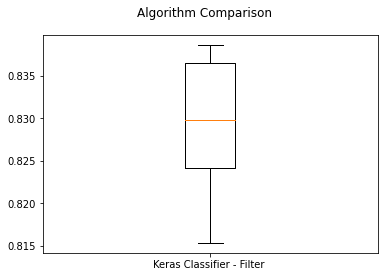

In [ ]:
# The Keras on Filter output  
# Best: 0.831079 using {'batch_size': 20, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME1'}
models1 = []
models1.append(('Keras Classifier - Filter ', KerasClassifier(build_fn=create_model4, batch_size= 20, epochs= 10, init = 'uniform', optimizer='WAME1')))
# evaluate the model 
results = []
names = []
scoring = 'accuracy'
for name, model1 in models1:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True) # Using K Fold cross validation
  cv_results = cross_val_score(model1, pca_filter_train_features, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm 
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1685 - accuracy: 0.7724
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1199 - accuracy: 0.8308
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1175 - accuracy: 0.8274
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1136 - accuracy: 0.8347
Epoch 5/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1146 - accuracy: 0.8321
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1100 - accuracy: 0.8430
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1099 - accuracy: 0.8425
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.8379
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1097 - accuracy: 0.8405
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.108

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1637 - accuracy: 0.7673
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1216 - accuracy: 0.8232
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1183 - accuracy: 0.8278
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1153 - accuracy: 0.8298
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1137 - accuracy: 0.8309
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.8323
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1130 - accuracy: 0.8340
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1113 - accuracy: 0.8400
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.8390
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.111

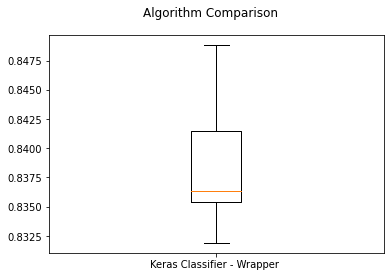

In [ ]:
# The Keras on Wrapper output
#Best: 0.840992 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME4'}
models2 = []
models2.append(('Keras Classifier - Wrapper ', KerasClassifier(build_fn=create_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME4')))
# evaluate the model 
results = []
names = []
scoring = 'accuracy'
for name, model2 in models2:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True) # Using K Fold cross validation
  cv_results = cross_val_score(model2, pca_wrapper_train_features, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm 
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Epoch 1/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1882 - accuracy: 0.7562
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1308 - accuracy: 0.8096
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1262 - accuracy: 0.8161
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1203 - accuracy: 0.8230
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1168 - accuracy: 0.8272
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1169 - accuracy: 0.8262
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1166 - accuracy: 0.8248
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1151 - accuracy: 0.8264
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1136 - accuracy: 0.8304
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1152 - accuracy: 0.8304

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


679/679 [==============================] - 1s 1ms/step - loss: 0.1937 - accuracy: 0.7531
Epoch 2/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1328 - accuracy: 0.8088
Epoch 3/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1293 - accuracy: 0.8162
Epoch 4/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1263 - accuracy: 0.8245
Epoch 5/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1281 - accuracy: 0.8206
Epoch 6/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1251 - accuracy: 0.8252
Epoch 7/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1260 - accuracy: 0.8232
Epoch 8/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1226 - accuracy: 0.8263
Epoch 9/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1250 - accuracy: 0.8241
Epoch 10/10
679/679 [==============================] - 1s 1ms/step - loss: 0.1220 - accuracy: 0.8282
Epoch 1/10

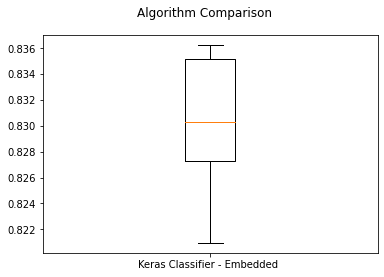

In [ ]:
# The Keras on Embedded Method
#Best: 0.833267 using {'batch_size': 40, 'epochs': 10, 'init': 'uniform', 'optimizer': 'WAME3'}
models3 = []
models3.append(('Keras Classifier - Embedded ', KerasClassifier(build_fn=create_model2, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME3')))
# evaluate the model 
results = []
names = []
scoring = 'accuracy'
for name, model3 in models3:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True) # Using K Fold cross validation
  cv_results = cross_val_score(model3, pca_embedded_train_features, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## b) Predicting labels of test data instances and evaluating model based on :

(i) Time taken to build model

(ii) Time taken to test model

(iii) Model Accuracy

(iv) Model Error Rate

(v) DetectionRate

(vi) False Positive

(vii) Type II Error

(viii) Matthews correlation coefficient (MCC)

In [ ]:
# Predicting of Test data of Filter method 
models1 = []
models1.append(('Keras Classifier - Filter Model', KerasClassifier(build_fn=create_model4, batch_size= 20, epochs= 10, init = 'uniform', optimizer='WAME1')))


for name, model1 in models1:
  print("-----------------------------------------------")
  print("Model : ", name)
  model_start = time.time()
  model1.fit(pca_filter_train_features, Y)
  print("Time to build model (sec) : %.4f " % round(time.time()-model_start,4))
  start = time.time()
  predicted = model1.predict(pca_filter_test_features)
  print("Time to test model (sec) : %.4f " % round(time.time()-start,4))
  matrix = confusion_matrix(Y_t, predicted)
  print("Time elapsed (sec): %.4f " % round(time.time()-model_start, 4))
  print(matrix)

  TN1 = matrix[0][0]
  FN1 = matrix[1][0]
  FP1 = matrix[0][1]
  TP1 = matrix[1][1]

  DetectionRate_LR = TP1/(TP1+FN1)
  Alarm_LR =   FP1/(FP1+TN1)

  # To built a MCC for LR
  MCC_num_LR= (TP1*TN1)-(FP1*FN1) 
  MCC_din_LR= math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1 + FP1)*(TN1+FN1))

  MCC_LR = MCC_num_LR / MCC_din_LR
  Acc_LR = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
  Err_LR = 1 - Acc_LR
  T2_Err = (FN1 / (FN1+TP1))
  print("Model Accuracy : %s"%(Acc_LR))
  print("Model Error Rate : %s"%(Err_LR))
  print("Detection Rate :%s"%(DetectionRate_LR))
  print("False Positive Type 1 :%s"%(Alarm_LR))
  print("Type 2 Error : %s"%(T2_Err))
  print("Matthews correlation coefficient (MCC):%s"%(MCC_LR))

-----------------------------------------------
Model :  Keras Classifier - Filter
Epoch 1/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1662 - accuracy: 0.7676
Epoch 2/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1261 - accuracy: 0.8129
Epoch 3/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1234 - accuracy: 0.8133
Epoch 4/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1222 - accuracy: 0.8174
Epoch 5/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1196 - accuracy: 0.8253
Epoch 6/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1192 - accuracy: 0.8229
Epoch 7/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1182 - accuracy: 0.8283
Epoch 8/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1175 - accuracy: 0.8256
Epoch 9/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1146 - accuracy: 0.8304

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test model (sec) : 0.4599 
Time elapsed (sec): 17.6678 
[[10538   822]
 [ 1738  1962]]
Model Accuracy : 0.8300132802124834
Model Error Rate : 0.16998671978751656
Detection Rate :0.5302702702702703
False Positive Type 1 :0.07235915492957747
Type 2 Error : 0.4697297297297297
Matthews correlation coefficient (MCC):0.5078180787927452


In [ ]:
# Predicting of Test data of Wrapper method 
models2 = []
models2.append(('Keras Classifier - Wrapper Model', KerasClassifier(build_fn=create_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME4')))


for name, model in models:
  print("-----------------------------------------------")
  print("Model : ", name)
  model_start = time.time()
  model2.fit(pca_wrapper_train_features, Y)
  print("Time to build model (sec) : %.4f " % round(time.time()-model_start,4))
  start = time.time()
  predicted = model2.predict(pca_wrapper_test_features)
  print("Time to test model (sec) : %.4f " % round(time.time()-start,4))
  matrix = confusion_matrix(Y_t, predicted)
  print("Time elapsed (sec): %.4f " % round(time.time()-model_start, 4))
  print(matrix)

  TN1 = matrix[0][0]
  FN1 = matrix[1][0]
  FP1 = matrix[0][1]
  TP1 = matrix[1][1]

  DetectionRate_LR = TP1/(TP1+FN1)
  Alarm_LR =   FP1/(FP1+TN1)

  # To built a MCC for LR
  MCC_num_LR= (TP1*TN1)-(FP1*FN1) 
  MCC_din_LR= math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1 + FP1)*(TN1+FN1))

  MCC_LR = MCC_num_LR / MCC_din_LR
  Acc_LR = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
  Err_LR = 1 - Acc_LR
  T2_Err = (FN1 / (FN1+TP1))
  print("Model Accuracy : %s"%(Acc_LR))
  print("Model Error Rate : %s"%(Err_LR))
  print("Detection Rate :%s"%(DetectionRate_LR))
  print("False Positive Type 1 :%s"%(Alarm_LR))
  print("Type 2 Error : %s"%(T2_Err))
  print("Matthews correlation coefficient (MCC):%s"%(MCC_LR))

-----------------------------------------------
Model :  Keras Classifier - Wrapper
Epoch 1/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1579 - accuracy: 0.7850
Epoch 2/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1195 - accuracy: 0.8291
Epoch 3/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1151 - accuracy: 0.8306
Epoch 4/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1158 - accuracy: 0.8292
Epoch 5/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1144 - accuracy: 0.8275
Epoch 6/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1148 - accuracy: 0.8322
Epoch 7/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1120 - accuracy: 0.8366
Epoch 8/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.8357
Epoch 9/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.837

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test model (sec) : 0.4636 
Time elapsed (sec): 17.2323 
[[10448   912]
 [ 1539  2161]]
Model Accuracy : 0.8372509960159362
Model Error Rate : 0.16274900398406378
Detection Rate :0.5840540540540541
False Positive Type 1 :0.08028169014084507
Type 2 Error : 0.41594594594594597
Matthews correlation coefficient (MCC):0.5381307807007474


In [ ]:
# Predicting of Test data of Embedded method 
models3 = []
models3.append(('Keras Classifier - Embedded Model', KerasClassifier(build_fn=create_model6, batch_size= 40, epochs= 10, init = 'uniform', optimizer='WAME3')))


for name, model in models:
  print("-----------------------------------------------")
  print("Model : ", name)
  model_start = time.time()
  model3.fit(pca_embedded_train_features, Y)
  print("Time to build model (sec) : %.4f " % round(time.time()-model_start,4))
  start = time.time()
  predicted = model3.predict(pca_embedded_test_features)
  print("Time to test model (sec) : %.4f " % round(time.time()-start,4))
  matrix = confusion_matrix(Y_t, predicted)
  print("Time elapsed (sec): %.4f " % round(time.time()-model_start, 4))
  print(matrix)

  TN1 = matrix[0][0]
  FN1 = matrix[1][0]
  FP1 = matrix[0][1]
  TP1 = matrix[1][1]

  DetectionRate_LR = TP1/(TP1+FN1)
  Alarm_LR =   FP1/(FP1+TN1)

  # To built a MCC for LR
  MCC_num_LR= (TP1*TN1)-(FP1*FN1) 
  MCC_din_LR= math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1 + FP1)*(TN1+FN1))

  MCC_LR = MCC_num_LR / MCC_din_LR
  Acc_LR = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
  Err_LR = 1 - Acc_LR
  T2_Err = (FN1 / (FN1+TP1))
  print("Model Accuracy : %s"%(Acc_LR))
  print("Model Error Rate : %s"%(Err_LR))
  print("Detection Rate :%s"%(DetectionRate_LR))
  print("False Positive Type 1 :%s"%(Alarm_LR))
  print("Type 2 Error : %s"%(T2_Err))
  print("Matthews correlation coefficient (MCC):%s"%(MCC_LR))

-----------------------------------------------
Model :  Keras Classifier - Embedded
Epoch 1/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1753 - accuracy: 0.7793
Epoch 2/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1296 - accuracy: 0.8175
Epoch 3/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1249 - accuracy: 0.8222
Epoch 4/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1186 - accuracy: 0.8258
Epoch 5/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1158 - accuracy: 0.8281
Epoch 6/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1159 - accuracy: 0.8288
Epoch 7/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1145 - accuracy: 0.8321
Epoch 8/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.8334
Epoch 9/10
755/755 [==============================] - 1s 1ms/step - loss: 0.1130 - accuracy: 0.8336
Epoch 10/10
755

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test model (sec) : 0.2903 
Time elapsed (sec): 9.1702 
[[10369   991]
 [ 1605  2095]]
Model Accuracy : 0.8276228419654714
Model Error Rate : 0.17237715803452858
Detection Rate :0.5662162162162162
False Positive Type 1 :0.08723591549295774
Type 2 Error : 0.4337837837837838
Matthews correlation coefficient (MCC):0.5108461119040855
